In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# Function to know if we have a CCW turn
def CCW(p1, p2, p3):
	if (p3[1]-p1[1])*(p2[0]-p1[0]) >= (p2[1]-p1[1])*(p3[0]-p1[0]):
		return True
	return False

# Main function:
def GiftWrapping(S):
	n = len(S)
	P = [None] * n
	l = np.where(S[:,0] == np.min(S[:,0]))
	pointOnHull = S[l[0][0]]
	i = 0
	while True:
		P[i] = pointOnHull       
		endpoint = S[0]
		for j in range(1,n):
			if (endpoint[0] == pointOnHull[0] and endpoint[1] == pointOnHull[1]) or not CCW(S[j],P[i],endpoint):
				endpoint = S[j]
		i = i + 1
		pointOnHull = endpoint
		if endpoint[0] == P[0][0] and endpoint[1] == P[0][1]:
			break
	for i in range(n):
		if P[-1] is None:
			del P[-1]
	return np.array(P)

# Main function:
def GiftWrapping2(S,hullPIdx):
	count = 0
	n = len(S)
	P = [None] * n
	l = np.where(S[:,0] == np.min(S[:,0]))
	pointOnHull = S[l[0][0]]
	hullPIdx[count]=l[0][0]
	count=count+1
	i = 0
	temp = 0
	while True:
		P[i] = pointOnHull
		endpoint = S[0]
		#count=count+1
		temp = 0
        
		for j in range(1,n):
			if (endpoint[0] == pointOnHull[0] and endpoint[1] == pointOnHull[1]) or not CCW(S[j],P[i],endpoint):
				endpoint = S[j]
				temp = j
                
		i = i + 1
		pointOnHull = endpoint
		hullPIdx[count]=temp
		count=count+1
		if endpoint[0] == P[0][0] and endpoint[1] == P[0][1]:
			break
	for i in range(n):
		if P[-1] is None:
			del P[-1]
	return np.array(P)

In [2]:
import numpy
import math

def _sort_byangle(R,li):
    li2=[]
    arr=[0]*len(li)
    for i in range(len(li)):
        arr[i]=R[li[i]][1]

    s = numpy.array(arr)
    sort_index = numpy.argsort(s)
    for i in range(len(li)):
        li2.append(li[sort_index[i]])
    return li2

def _is_sameside_withcent(P,a,b,p): #p,is same side with cent,for ab
    _same=0
    f1=(P[b][0]-P[a][0])*(P[p][1]-P[a][1])-(P[b][1]-P[a][1])*(P[p][0]-P[a][0])
    f2=(P[b][0]-P[a][0])*(0-P[a][1])-(P[b][1]-P[a][1])*(0-P[a][0])
    #print("a:(",P[a][0],",",P[a][1],")")
    #print("b:(",P[b][0],",",P[b][1],")")
    #print("p:(",P[p][0],",",P[p][1],")")
    #print("(",f1,",",f2,")")
    if ((f1>0 and f2>0)or(f1<0 and f2<0)):
        _same=1 #concave
    return _same

def _compu_horiz_angle(P,p,anc): #horizo.angle,at anc.(anch.) for point p
    u=[0]*2
    u[0]=0-P[anc][0]
    u[1]=0-P[anc][1]
    v=[0]*2
    v[0]=P[p][0]-P[anc][0]
    v[1]=P[p][1]-P[anc][1]
    t1=math.sqrt(u[0]*u[0]+u[1]*u[1])
    t2=math.sqrt(v[0]*v[0]+v[1]*v[1])
    _costheta=(u[0]*v[0]+u[1]*v[1])/(t1*t2)
    if(_costheta>1):
        _costheta=1
    elif(_costheta<-1):
        _costheta=-1
    #print(_costheta)
    
    return math.acos(_costheta)

def _compu_horiz_angle2(p_coord,anc_coord):
    u=[0]*2
    v=[0]*2
    u[0]=0-anc_coord[0]
    u[1]=0-anc_coord[1]
    v[0]=p_coord[0]-anc_coord[0]
    v[1]=p_coord[1]-anc_coord[1]
    t1=math.sqrt(u[0]*u[0]+u[1]*u[1])
    t2=math.sqrt(v[0]*v[0]+v[1]*v[1])
    _costheta=(u[0]*v[0]+u[1]*v[1])/(t1*t2)
    #if(_costheta>1):
    #    _costheta=1
    #elif(_costheta<-1):
    #    _costheta=-1
    #print(_costheta)
    
    return math.acos(_costheta)
    


def _del_radius(R,fencpntlist): #first fwdiff of r
    fencpntdelr=[0]*len(fencpntlist)
    for i in range(len(fencpntlist)-1):
        fencpntdelr[i]=fencpntlist[i+1]-fencpntlist[i]
    return fencpntdelr
    
def _rotate_left(fencpntlist,nstep): #rotate list left by nstep
    #fencpntlist2=fencpntlist
    #for i in range(len(fencpntlist)-nstep):
    #    fencpntlist2[i]=fencpntlist[i+nstep]
    #    count=i
    #for i in range(nstep):
    #    fencpntlist2[count+1]=fencpntlist[i]
    #    count = count+1
    #return fencpntlist2
    fencpntlist1 = [fencpntlist[index+nstep] for index in range(len(fencpntlist)-nstep)]
    #print(fencpntlist1)
    ##fencpntlist2 = [fencpntlist[len(fencpntlist)-nstep+index] for index in range(nstep)]
    fencpntlist2 = fencpntlist[0:nstep]
    #print(fencpntlist2)
    #fencpntlist1=fencpntlist(nstep:end)
    #fencpntlist2=fencpntlist(begin:nstep-1)
    fencpntlist1.extend(fencpntlist2)
    return fencpntlist1

def _clean_fence(fencpntlist): #drop -1,repeat point
    cleanfence=[]
    for i in range(len(fencpntlist)-1):
        if (fencpntlist[i] > -1 and fencpntlist[i]!=fencpntlist[i+1]):
            cleanfence.append(fencpntlist[i])
    if (fencpntlist[len(fencpntlist)-1] > -1):
        cleanfence.append(fencpntlist[len(fencpntlist)-1])
    return cleanfence
        
def _proc_concavi(P,fencpntlist):#return list of concav. idx. per point
    fencpnt_conca_list=[]
    fencpnt_conca_list.append(_is_sameside_withcent(P,fencpntlist[len(fencpntlist)-1],fencpntlist[1],fencpntlist[0]))
    for i in range(len(fencpntlist)-2):
        fencpnt_conca_list.append(_is_sameside_withcent(P,fencpntlist[i],fencpntlist[i+2],fencpntlist[i+1]))
    fencpnt_conca_list.append(_is_sameside_withcent(P,fencpntlist[len(fencpntlist)-2],fencpntlist[0],fencpntlist[len(fencpntlist)-1]))    
    return fencpnt_conca_list
    
def _proc_convexit_prese(P,fencpntlist):#return list of concav. idx. per point #todo
    n=len(fencpntlist)-1
    l=fencpntlist[n]
    fencpntlist.append(l) #add,extra
    fencpnt_conca_list=[]
    fencpnt_conca_list.append(fencpntlist[0])
    n=2 #next
    s=0 #start
    p=1 #test pnt
    s2=0
    while True:
        if n<len(fencpntlist):
            s2=len(fencpnt_conca_list)
            # print("s2:",s2," n:",n," p:",p)
            if _is_sameside_withcent(P,fencpnt_conca_list[s2-1],fencpntlist[n],fencpntlist[p])==1:
                p=p+1
                n=n+1
                s1=s #check backward until convexit
                s2=len(fencpnt_conca_list)
                while s2>1:
                    if _is_sameside_withcent(P,fencpnt_conca_list[s2-2],fencpntlist[p],fencpnt_conca_list[s2-1])==1:
                        fencpnt_conca_list.pop()
                    else:
                        break
                    s2=len(fencpnt_conca_list)
            else:
                fencpnt_conca_list.append(fencpntlist[p])
                p=p+1
                n=n+1
        else:
            break
    
    fencpntlist.pop() #rem. extra
    #fencpnt_conca_list.append(_is_sameside_withcent(P,fencpntlist[len(fencpntlist)-1],fencpntlist[1],fencpntlist[0]))
    #for i in range(len(fencpntlist)-2):
    #    fencpnt_conca_list.append(_is_sameside_withcent(P,fencpntlist[i],fencpntlist[i+2],fencpntlist[i+1]))
    #fencpnt_conca_list.append(_is_sameside_withcent(P,fencpntlist[len(fencpntlist)-2],fencpntlist[0],fencpntlist[len(fencpntlist)-1]))    
    return fencpnt_conca_list


            
    

In [3]:
import math
from math import atan2
import numpy as np

_nbin=360
_binintv=2*math.pi/_nbin
_binarray=[] #list
#_binmaxvalarray=[]
_binmaxvalarray=[-1]*_nbin #array
_lar=999999
_sma=-100000
_lxparr=[] #low_x
_hxparr=[] #high_x
_lyparr=[] #low_y
_hyparr=[] #high_y


def _includ_horizo_poin_forpair_2(P,R,p1,p2): # find poin. betwe. p1, to p2
    ang1=R[p1][1]
    ang2=R[p2][1]
    bin1= int(ang1/_binintv)
    bin2= int(ang2/_binintv)
    
    sidelen1=math.sqrt(P[p1][0]*P[p1][0] + P[p1][1]*P[p1][1]) 
    sidelen2=math.sqrt(P[p2][0]*P[p2][0] + P[p2][1]*P[p2][1])
    m0=(P[p1][0]+P[p2][0])/2
    m1=(P[p1][1]+P[p2][1])/2
    medianlen=math.sqrt(m0*m0 + m1*m1)
    _case=-1
    if (medianlen < sidelen1 and medianlen < sidelen2):
        _case=0
    elif (medianlen < sidelen1):
        _case=0 # side2 is shrter #2
    elif (medianlen < sidelen2):
        _case=0 # side1 is shrter #1  
        
    
    hplist=[]
    #hang12=_compu_horiz_angle(P,p2,p1)
    _binarray_temp12=np.array(_binarray[bin1]);
    #hang21=_compu_horiz_angle(P,p1,p2)
    _binarray_temp21=np.array(_binarray[bin2])
    
    if _case==0:
        for i in range(len(_binarray_temp12)):
            j=_binarray_temp12[i]
            if (R[j][1]>ang1 and _is_sameside_withcent(P,p1,p2,j)==0):  #_is_sameside_withcent(P,a,b,p) #_compu_horiz_angle(P,j,p1)>hang12
                hplist.append(j)
            
        for i in range(len(_binarray_temp21)):
            j=_binarray_temp21[i]
            if (R[j][1]<ang2 and _is_sameside_withcent(P,p1,p2,j)==0):
                hplist.append(j)
    elif _case==2:   
        for i in range(len(_binarray_temp12)):
            j=_binarray_temp12[i]
            if (R[j][1]>ang1 and _is_sameside_withcent(P,p1,p2,j)==0):
                hplist.append(j)
    elif _case==1:
        for i in range(len(_binarray_temp21)):
            j=_binarray_temp21[i]
            if (R[j][1]<ang2 and _is_sameside_withcent(P,p1,p2,j)==0):
                hplist.append(j)
            
    return hplist

def _includ_horizo_poin_forpair(P,R,p1,p2): # find poin. betwe. p1, to p2
    ang1=R[p1][1]
    ang2=R[p2][1]
    bin1= int(ang1/_binintv)
    bin2= int(ang2/_binintv)
    hplist=[]
    hang12=_compu_horiz_angle(P,p2,p1)
    _binarray_temp=np.array(_binarray[bin1]);
    for i in range(len(_binarray_temp)):
        j=_binarray_temp[i]
        if (R[j][1]>ang1 and _compu_horiz_angle(P,j,p1)>hang12):
            hplist.append(j)
            
    hang21=_compu_horiz_angle(P,p1,p2)
    _binarray_temp=np.array(_binarray[bin2])
    for i in range(len(_binarray_temp)):
        j=_binarray_temp[i]
        if (R[j][1]<ang2 and _compu_horiz_angle(P,j,p2)>hang21):
            hplist.append(j)
            
    return hplist
            
def _includ_horizo_poin(P,R,fencpntlist):
    hplist0=[]
    for i in range(len(fencpntlist)-1):
        #hplist=_includ_horizo_poin_forpair(P,R,fencpntlist[i],fencpntlist[i+1])
        hplist=_includ_horizo_poin_forpair_2(P,R,fencpntlist[i],fencpntlist[i+1])
        #print("[",fencpntlist[i],",",fencpntlist[i+1],"]:", hplist)
        if len(hplist) > 0:
            hplist0.extend(hplist)
    fencpntlist2=fencpntlist
    fencpntlist2.extend(hplist0)
    #print("hplist0:", hplist0)
    #print("fencpntlist2:", fencpntlist2)
    return fencpntlist2
    

# Main function:
def HorizonPoint(S):
    n = len(S)
    P=S
    
    R=P
    sx=0
    sy=0
    hx=_sma
    lx=_lar
    hy=_sma
    ly=_lar
    mx=0
    my=0
    for i in range(n):
        if P[i,0]>=hx:
            hx=P[i,0]
        if P[i,0]<=lx:
            lx=P[i,0]
        if P[i,1]>=hy:
            hy=P[i,1]
        if P[i,1]<=ly:
            ly=P[i,1]
        sx = sx + P[i,0]
        sy = sy + P[i,1]
        
    mx=sx/n
    my=sy/n
    hx=hx-mx
    lx=lx-mx
    hy=hy-my
    ly=ly-my
    
    # binning
    for i in range(_nbin):
        _binarray.append([])
    temp=0
    temp2=0
    #R = [[0]*n]*2
    R2 = [(0,0) for j in range(n)]
    R2=np.array(R2, dtype='f')
    for i in range(n):
        P[i,0]=(P[i,0]-mx)
        P[i,1]=(P[i,1]-my)
        #print("[",P[i,0],",",P[i,1],"]")
        
        R2[i,0]=math.sqrt(P[i,0]*P[i,0]+P[i,1]*P[i,1])
        
        temp=math.atan2(P[i,1],P[i,0]) #_approx_atan2(P[i,1],P[i,0]) 
        
        if temp >= 0:
            R2[i,1]=temp
        else:
            R2[i,1]=2*math.pi+temp
        #R[i,1]=temp if temp >= 0 else (2*math.pi+temp)
        #print("[",R2[i,0],",",R2[i,1],"]")
        
        temp2=int(R2[i,1]/_binintv)
        
        #print("( ", temp, ",", temp2, ",", R2[i,0], ",", R2[i,1],",",_binintv,"," ,")")
        _binarray[temp2].append(i)
        if len(_binarray[temp2])==0:
            _binmaxvalarray[temp2]=i
        elif R2[_binmaxvalarray[temp2],0] < R2[i,0]:
            _binmaxvalarray[temp2]=i
        if P[i,0]==lx:
            _lxparr.append(i)
        elif P[i,0]==hx:
            _hxparr.append(i)
        elif P[i,1]==ly:
            _lyparr.append(i)
        elif P[i,1]==hy:
            _hyparr.append(i)
            
    
    #fencing

    
            
    #_bndarr=_hxparr;
    _bndlist=[]
    #for i in range(_nbin):
    #    _bndlist.append(_binmaxvalarray[i])
    for i in range(len(_hxparr)):
        _bndlist.append(_hxparr[i])
    for i in range(len(_hyparr)):
        _bndlist.append(_hyparr[i])
    for i in range(len(_lxparr)):
        _bndlist.append(_lxparr[i])
    for i in range(len(_lyparr)):
        _bndlist.append(_lyparr[i])  
    if len(_bndlist)>0:
        _bndlist=_sort_byangle(R2,_bndlist)
    
    b0=-1
    if len(_bndlist)>0:
        b0=_bndlist[0];
        
    for i in range(_nbin):
        _bndlist.append(_binmaxvalarray[i])
    if len(_bndlist)>0:
        _bndlist=_sort_byangle(R2,_bndlist)
    
    #print("_nbin:", _nbin, " _bndlist(len): ", len(_bndlist))
    #print("( ", mx, ",", my, ")")
    #print("( ", hx, ",", lx, ",", hy, ",", ly,")")
    
    _bndlist2=_bndlist
    
    k=-1
    count=0
    if (b0>-1):
        for i in range(len(_bndlist)):
            if(_bndlist[i]==b0):
                k=i
                break
        #print("k:",k)
        _bndlist=_rotate_left(_bndlist,k)
   
    _bndlist=_clean_fence(_bndlist)
    k=_bndlist[0]
    _bndlist.append(k)
    
    #print(_del_radius(R2,_bndlist))
    
    #print(_proc_concavi(P,_bndlist))
    _bndlist=_proc_convexit_prese(P,_bndlist)
    #print(_bndlist)
    
    
    _bndlist=_includ_horizo_poin(P,R2,_bndlist) #method_takes 5 sec.
    _bndlist.pop()
    
    
    P2=[None]*len(_bndlist)
    for i in range(len(_bndlist)):
        P2[i]=P[_bndlist[i]]
    
    print("reduction %: ", (1-len(P2)/len(S))*100, " #points: ", len(S))
    
    P1 = GiftWrapping(np.array(P2))
    
    #if len(_bndlist)>0:
    #    _bndlist=_sort_byangle(R2,_bndlist)
    #print("_bndlist(1):", _bndlist)
    #j=_bndlist[0]
    #_bndlist.append(j)
    #_bndlist=_proc_convexit_prese(P,_bndlist)
    #print("_bndlist(2):", _bndlist)
    
    
    
    #P1 = [(P[_bndlist[i]][0]+mx,P[_bndlist[i]][1]+my) for i in range(len(_bndlist))]
    ## P1 = [(P[_bndlist[i]][0],P[_bndlist[i]][1]) for i in range(len(_bndlist))]
        
    return np.array(P1)




reduction %:  42.10526315789473  #points:  19
Runtime of the program is 0.05484938621520996


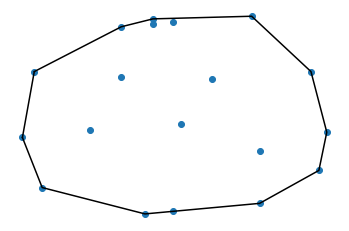

In [4]:
import pandas as pd
import time
##df2 = pd.read_csv('E:\\wrk\\code\\c_c++\\_cyg\\_out_disp\\_csv.file\\02.Formica.csv')  
df2 = pd.read_csv('_test1.csv')  #_test1.csv#01.BugattiAtlantic,02.Formica,03.Flight,04.T-800-Head,05.Al,_test,dgen1,dgen2,001-circle_firsttwolinrem,002-circle_firsttwolinrem 
N,M=df2.shape
#P1=np.zeros(N,M)

    
P1 = [(df2.loc[[i],'x'],df2.loc[[i],'y']) for i in range(N)]
P=np.array(P1, dtype='f')



start = time.time()
# hull = ConvexHull(df[['col_1','col_2']])

# L = GiftWrapping(df[['col_1','col_2']])
## N = int(input("Introduce N: "))
#N = 10001
#P = np.array([(np.random.randint(0,1000),np.random.randint(0,1000)) for i in range(N)])
L = HorizonPoint(P)

import matplotlib.pyplot as plt


# plt.plot(df['col_1'], df['col_2'], 'o')
# for simplex in hull.simplices:
#     plt.plot(df['col_1'].iloc[simplex], df['col_2'].iloc[simplex], 'k-')
# end = time.time()

# # total time taken
# print(f"Runtime of the program is {end - start}")

# Plot the computed Convex Hull:
plt.figure()
plt.plot(P[:,0],P[:,1],"o")  #marker=".", markersize=40
##plt.plot(P[:,0],P[:,1],marker=".", markersize=1)
plt.plot(L[:,0],L[:,1], 'k-') #, linewidth=2, markersize=5
plt.plot([L[-1,0],L[0,0]],[L[-1,1],L[0,1]], 'k-')
##plt.plot(L[0,0],L[0,1], 'r*')
plt.axis('off')
#plt.show()
end = time.time()
# total time taken
print(f"Runtime of the program is {end - start}")

In [5]:
_tangent_diff_=0.000000001 #0.5#0.01,0.05  #0.000000001 #0.000000000000001
def _inclu_miss_chull_pnt(hpidx,cPIdx,LS1,LE1):
    #incre. LS1,LE1,with chul. pnt. hpidx_g,inclu. als.in cPIdx
    LS1_0=LS1
    LE1_0=LE1
    #print("_inclu_miss_chull_pnt(0)**n:")
    #result = np.where(arr == 15)
    for i in range(len(hpidx)):
        #print("_inclu_miss_chull_pnt(-2)**n:"," ",len((np.where(LS1 == hpidx[i]))[0])," ", hpidx[i])
        if(len((np.where(LS1 == hpidx[i]))[0])==0):
            #print("_inclu_miss_chull_pnt(-1)**n:")
            n=0
            for j in range(i):
                if((i-1-j)>0 and len((np.where(LS1 == hpidx[i-1-j]))[0])>0):
                    n=(np.where(LS1 == hpidx[i-1-j]))[0]
                    break
                elif((i-1-j)==0):
                    n=0
                    break
            #print("_inclu_miss_chull_pnt**n:",n," ", hpidx[i], " before:LS1", LS1)
            #LS1.insert(n,hpidx[i])
            LS1=np.insert(LS1,n+1,[hpidx[i]],0)
            #print("_inclu_miss_chull_pnt**n:",n," ", hpidx[i], " after:LS1", LS1)
            n=0
            for j in range(i):
                if((i-1-j)>0 and len((np.where(LE1 == hpidx[i-1-j]))[0])>0):
                    n=(np.where(LE1 == hpidx[i-1-j]))[0]
                    break
                elif((i-1-j)==0):
                    n=0
                    break
            #print("_inclu_miss_chull_pnt(2)**n:",n)
            #LE1.insert(n,hpidx[i])
            LE1=np.insert(LE1,n+1,[hpidx[i]],0)
            
            L = [LS1,LE1]
            #print("_inclu_miss_chull_pnt(2)**n:",L)
            return L
        
    

def _firstfwdiff(P,LS1,LE1,Lk1,fwPidx):
    #g0=(P[P1[1]][1]-P[P1[0]][1])/(P[P1[1]][0]-P[P1[0]][0])
    ##g0=(P[1][1]-P[0][1])/(P[1][0]-P[0][0])
    g0=math.atan2((P[1][1]-P[0][1]),(P[1][0]-P[0][0]))
    tglst=[]
    #tglst.append(P1[0])
    tglst.append(0)
    count = 0
    LS1[0]=0
    count_f = 0
    fwPidx[count_f] = 0
    count_f = count_f + 1
    for i in range(len(P)-2):
    
        ##g=(P[i+2][1]-P[i+1][1])/(P[i+2][0]-P[i+1][0])
        g=math.atan2((P[i+2][1]-P[i+1][1]), (P[i+2][0]-P[i+1][0]))
        if(abs(g-g0)>_tangent_diff_):
            #comput pnt of intersec for contr.pnt.  ##late.
            #tglst.append(P1[i+1]) #contr. pnt.
            tglst.append(i+1) #contr. pnt.
            #print("(-g-g0):",(-g-g0))
            LE1[count]=i+1
            count = count + 1
            LS1[count]=i+1
            fwPidx[count_f] = i+1
            count_f = count_f + 1
        g0=g
    #do it for last two pnt. ##late.
    P2=[None]*len(tglst)
    for i in range(len(tglst)):
        P2[i]=P[tglst[i]]
    
    #print("FWdlen: ",len(P2), " reduc(%): ", (len(P2)/len(P))*100)
    return np.array(P2)


def _merge_convexseg_point3(P,hpidx,cPIdx):
    mrglst=[]
    for j in range(len(cPIdx)):
        if(cPIdx[j]==hpidx[0]):
            j_1=j;
            break;
    i=0
    j=j_1
    while(i<len(hpidx)-1):
        a=hpidx[i]
        b=hpidx[i+1]
        k=0
        mrglst.append(hpidx[i])
        while((j+k)<len(cPIdx) and cPIdx[j+k] !=b):
            if(_is_sameside_withcent(P,a,b,cPIdx[j+k])==0):
                mrglst.append(cPIdx[j+k])
            ##mrglst.append(cPIdx[j+k])
            k=k+1
        mrglst.append(hpidx[i+1])
        j=j+k
        i=i+1
        if((j+k)==len(cPIdx)):
            j=0
    return np.array(mrglst)

def _merge_convexseg_point2(hpidx,cPIdx,LS1,LE1):#fwPidx,=LS1,#hpidx,hpidx_g
    #trav.to find the start idx of hpidx in fwPidx
    #e.g.hpidx: [ 7  9 10 12 14 15 16  0  2  4  6  7 -1 -1 -1 -1 -1 -1]
    #cPIdx: [ 1 17 16 15  0  3  2  6  7 11 12  8 13  9 14 10  5  4  1]
    i=0
    j1=0
    j_1=0
    k_1=0
    for j in range(len(cPIdx)):
        if(cPIdx[j]==hpidx[0]):
            j_1=j;
            break;
    for k in range(len(LS1)):
        if(LS1[k]==hpidx[0]):
            k_1=k;
            break;
    #todo 
    
    #print("_merge_convexseg_point2:hpidx:",hpidx)
    #print("_merge_convexseg_point2:cPIdx:",cPIdx)
    #print("_merge_convexseg_point2:LS1:",LS1)
    #print("_merge_convexseg_point2:LE1:",LE1)

    
    mrglst=[]
    i=0
    j=j_1
    k=k_1
    while (k<len(LE1) and i<len(hpidx) and j<len(cPIdx)):
        mrglst.append(hpidx[i])
        #j=j1
        #k=k1
        #while True:
            #
        ######print("j:",j," cPIdx[j]:", cPIdx[j]," i:",i," hpidx[i]:",hpidx[i])
        while j<len(cPIdx) and cPIdx[j] != hpidx[i]:
            j = j+1
        while k<len(LS1) and LS1[k] != hpidx[i]:
            k = k+1
        k1=k    
        #spi=LS1[k1]
        #epi=LE1[k1]
        #if(i<len(hpidx)-1 and k<len(LE1) and hpidx[i]==LS1[k] and hpidx[i+1]==LE1[k]):
        if(i<len(hpidx)-1 and j<len(cPIdx)-1 and k<len(LE1) and ~(cPIdx[j]==LS1[k] and cPIdx[j+1]==LE1[k])):
            #print("_merge_convexseg_point2:----:",j)
            while j<len(cPIdx)-1 and cPIdx[j+1] != LE1[k]:
                #print()
                j = j+1
                mrglst.append(cPIdx[j])
                #j = j+1
        #j1=j
        k=k+1
        i = i+1
        if(k==len(LE1) and i==len(hpidx) and j==len(cPIdx)):
            break
    j=0
    k=0
    #while True:
    while(k<len(LE1) and i<len(hpidx) and j<len(cPIdx)):
        #print("_merge_convexseg_point2(1):----:",j)
        mrglst.append(hpidx[i])
        #j=j1
        #k=k1
        #while True:
            #
        while j<len(cPIdx) and cPIdx[j] != hpidx[i]:
            #print("_merge_convexseg_point2(2):----:",j)
            j = j+1
        while k<len(LS1) and LS1[k] != hpidx[i]:
            #print("_merge_convexseg_point2(3):----:",k)
            k = k+1
        k1=k    
        #spi=LS1[k1]
        #epi=LE1[k1]
        #if(i<len(hpidx)-1 and k<len(LE1) and hpidx[i]==LS1[k] and hpidx[i+1]==LE1[k]):
        if(i<len(hpidx)-1 and j<len(cPIdx)-1 and k<len(LE1) and ~(cPIdx[j]==LS1[k] and cPIdx[j+1]==LE1[k])):
            while j<len(cPIdx)-1 and cPIdx[j+1] != LE1[k]:
                #print()
                j = j+1
                mrglst.append(cPIdx[j])
                #j = j+1
        #j1=j
        k=k+1
        i = i+1
        if(k==len(LE1) and i==len(hpidx) and j==len(cPIdx)):
            break
    #return mrglst       
            
    
        
    #print("mrglst:",mrglst, " mrglst.len:",len(mrglst))    
        
    #P2=[None]*len(mrglst)
    #for i in range(len(mrglst)):
    #    P2[i]=mrglst[i]
    #print("P2:",P2) 
    #return mrglst
    return np.array(mrglst)


def _merge_convexseg_point(L1,L2,LS1,LE1): #L1,orig.boundar.,L2,reduc. boun.;merge points in between two endcontpoint
    tglst=[]
    count = 0
    
    #for i in range(len(LS1)):
    #    i1=i
        
    
    
    for i in range(len(L1)-1):
        #print("--1")
        if(LS1[count] >-1 and L2[LS1[count]][0] == L1[i][0] and L2[LS1[count]][1] == L1[i][1]):
            print("--2")
            tglst.append(i+1)
            #print("count:",count," LS1[count]:", LS1[count], " L2[LS1[count]]:", L2[LS1[count]], " L1[i]:",L1[i])
            if(LE1[count] >-1 and ~(L2[LE1[count]][0] == L1[i+1][0] and L2[LE1[count]][1] == L1[i+1][1])):
                #insert
                #print("count:",count," LE1[count]:", LE1[count], " L2[LE1[count]]:", L2[LE1[count]]," L1[i+1]:",L1[i+1])
                while(i<(len(L1)-1) and  LE1[count] < i and ~(L2[LE1[count]][0] == L1[i+1][0] and L2[LE1[count]][1] == L1[i+1][1])):
                    tglst.append(i+1)
                    i = i+1
                #count = count + 1
            count = count + 1
    P2=[None]*len(tglst)
    for i in range(len(tglst)):
        P2[i]=P[tglst[i]]     
    
    return np.array(P2)
    
    
# Main function:
def HorizonPoint_Contou(S,conPIdx):
    n = len(S)
    P=S
    
    R=P
    sx=0
    sy=0
    hx=_sma
    lx=_lar
    hy=_sma
    ly=_lar
    mx=0
    my=0
    for i in range(n):
        if P[i,0]>=hx:
            hx=P[i,0]
        if P[i,0]<=lx:
            lx=P[i,0]
        if P[i,1]>=hy:
            hy=P[i,1]
        if P[i,1]<=ly:
            ly=P[i,1]
        sx = sx + P[i,0]
        sy = sy + P[i,1]
        
    mx=sx/n
    my=sy/n
    hx=hx-mx
    lx=lx-mx
    hy=hy-my
    ly=ly-my
    
    # binning
    for i in range(_nbin):
        _binarray.append([])
    temp=0
    temp2=0
    #R = [[0]*n]*2
    R2 = [(0,0) for j in range(n)]
    R2=np.array(R2, dtype='f')
    for i in range(n):
        P[i,0]=(P[i,0]-mx)
        P[i,1]=(P[i,1]-my)
        #print("[",P[i,0],",",P[i,1],"]")
        
        R2[i,0]=math.sqrt(P[i,0]*P[i,0]+P[i,1]*P[i,1])
        
        temp=math.atan2(P[i,1],P[i,0]) #_approx_atan2(P[i,1],P[i,0]) 
        
        if temp >= 0:
            R2[i,1]=temp
        else:
            R2[i,1]=2*math.pi+temp
        #R[i,1]=temp if temp >= 0 else (2*math.pi+temp)
        #print("[",R2[i,0],",",R2[i,1],"]")
        
        temp2=int(R2[i,1]/_binintv)
        
        #print("( ", temp, ",", temp2, ",", R2[i,0], ",", R2[i,1],",",_binintv,"," ,")")
        _binarray[temp2].append(i)
        if len(_binarray[temp2])==0:
            _binmaxvalarray[temp2]=i
        elif R2[_binmaxvalarray[temp2],0] < R2[i,0]:
            _binmaxvalarray[temp2]=i
        if P[i,0]==lx:
            _lxparr.append(i)
        elif P[i,0]==hx:
            _hxparr.append(i)
        elif P[i,1]==ly:
            _lyparr.append(i)
        elif P[i,1]==hy:
            _hyparr.append(i)
            
    
    #fencing

    
            
    #_bndarr=_hxparr;
    _bndlist=[]
    #for i in range(_nbin):
    #    _bndlist.append(_binmaxvalarray[i])
    for i in range(len(_hxparr)):
        _bndlist.append(_hxparr[i])
    for i in range(len(_hyparr)):
        _bndlist.append(_hyparr[i])
    for i in range(len(_lxparr)):
        _bndlist.append(_lxparr[i])
    for i in range(len(_lyparr)):
        _bndlist.append(_lyparr[i])  
    if len(_bndlist)>0:
        _bndlist=_sort_byangle(R2,_bndlist)
    
    b0=-1
    if len(_bndlist)>0:
        b0=_bndlist[0];
        
    for i in range(_nbin):
        _bndlist.append(_binmaxvalarray[i])
    if len(_bndlist)>0:
        _bndlist=_sort_byangle(R2,_bndlist)
    
    print("_nbin:", _nbin, " _bndlist(len): ", len(_bndlist))
    print("( ", mx, ",", my, ")")
    print("( ", hx, ",", lx, ",", hy, ",", ly,")")
    
    _bndlist2=_bndlist
    
    k=-1
    count=0
    if (b0>-1):
        for i in range(len(_bndlist)):
            if(_bndlist[i]==b0):
                k=i
                break
        #print("k:",k)
        _bndlist=_rotate_left(_bndlist,k)
   
    _bndlist=_clean_fence(_bndlist)
    k=_bndlist[0]
    _bndlist.append(k)
    
    #print(_del_radius(R2,_bndlist))
    
    #print(_proc_concavi(P,_bndlist))
    _bndlist=_proc_convexit_prese(P,_bndlist)
    #print(_bndlist)
    
    
    ###_bndlist=_includ_horizo_poin(P,R2,_bndlist) #method_takes 5 sec.
    ###_bndlist.pop()
    
    conPIdxlst=[]
    P2=[None]*len(_bndlist)
    for i in range(len(_bndlist)):
        P2[i]=P[_bndlist[i]]
        conPIdx[count]=_bndlist[i]
        conPIdxlst.append(_bndlist[i])
        count = count + 1
        
    
    print("(contou.)reduction %: ", (1-len(P2)/len(S))*100, " #points: ", len(S))
    
    ###P1 = GiftWrapping(np.array(P2))
    
    #if len(_bndlist)>0:
    #    _bndlist=_sort_byangle(R2,_bndlist)
    #print("_bndlist(1):", _bndlist)
    #j=_bndlist[0]
    #_bndlist.append(j)
    #_bndlist=_proc_convexit_prese(P,_bndlist)
    #print("_bndlist(2):", _bndlist)
    
    conPIdx2=np.array(conPIdxlst)
    
    #P1 = [(P[_bndlist[i]][0]+mx,P[_bndlist[i]][1]+my) for i in range(len(_bndlist))]
    ## P1 = [(P[_bndlist[i]][0],P[_bndlist[i]][1]) for i in range(len(_bndlist))]
        
    ##return np.array(P2)
    return [np.array(P2),conPIdx2]

_nbin: 360  _bndlist(len):  364
(  [50.018644] , [50.029608] )
(  [49.97839579] , [-50.015697] , [49.96911789] , [-50.026279] )
(contou.)reduction %:  99.9718  #points:  1000000
Runtime of the program is 30.357885122299194


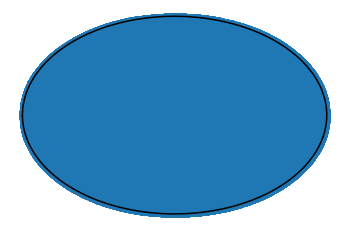

In [6]:
import pandas as pd
import time
##df2 = pd.read_csv('E:\\wrk\\code\\c_c++\\_cyg\\_out_disp\\_csv.file\\02.Formica.csv')  
df2 = pd.read_csv('001-circle_firsttwolinrem.csv')  #_test1.csv# 01.BugattiAtlantic,02.Formica,03.Flight,04.T-800-Head,05.Al,_test,dgen1,dgen2,001-circle_firsttwolinrem,002-circle_firsttwolinrem 
N,M=df2.shape
#P1=np.zeros(N,M)

    
P1 = [(df2.loc[[i],'x'],df2.loc[[i],'y']) for i in range(N)]
P=np.array(P1, dtype='f')



start = time.time()
# hull = ConvexHull(df[['col_1','col_2']])

# L = GiftWrapping(df[['col_1','col_2']])
## N = int(input("Introduce N: "))
#N = 10001
#P = np.array([(np.random.randint(0,1000),np.random.randint(0,1000)) for i in range(N)])
cPIdx = [-1]*len(P)
cPIdx = np.array(cPIdx)
__L = HorizonPoint_Contou(P,cPIdx)
L=__L[0]
cPIdx=__L[1]

import matplotlib.pyplot as plt


# plt.plot(df['col_1'], df['col_2'], 'o')
# for simplex in hull.simplices:
#     plt.plot(df['col_1'].iloc[simplex], df['col_2'].iloc[simplex], 'k-')
# end = time.time()

# # total time taken
# print(f"Runtime of the program is {end - start}")

# Plot the computed Convex Hull:


LS1 = [-1] * len(L) #strt.indi.
LE1 = [-1] * len(L) #en.indi.
Lk1 = [-1] * len(L) #ski.indi.

LS1=np.array(LS1)
LE1=np.array(LE1)
Lk1=np.array(Lk1)


fwPIdx=[-1]*len(L)
L1= _firstfwdiff(L,LS1,LE1,Lk1,fwPIdx)
#fwPIdx=fwPIdx[:len(L1)]
fwPIdx=cPIdx[fwPIdx[:len(L1)+1]]
LS1[:len(L1)+1]=cPIdx[LS1[:len(L1)+1]]
LE1[:len(L1)]=cPIdx[LE1[:len(L1)]]

#print("LS1:",LS1)
#print("LE1:",LE1)
hpidx=[-1]*(len(L1)+1)
hpidx=np.array(hpidx)
L2 = GiftWrapping2(np.array(L1),hpidx)

hpidx_g=cPIdx[hpidx[:len(L2)+1]]

#X=_inclu_miss_chull_pnt(hpidx_g,cPIdx,LS1,LE1)
#if(X != None ):
#    LS1 = X[0]    
#    LE1 = X[1]

#idx 
#print("cPIdx:",cPIdx)
#print("hpidx:",hpidx_g)
#print("fwPIdx:",fwPIdx)
#print("LS1:",LS1)
#print("LE1:",LE1)

#print("--L3:",L3, " len(L1):",len(L1),  " len(L2):",len(L2) )
##L3 = _merge_convexseg_point(np.array(L1),np.array(L2),LS1,LE1) #l3

#X=_inclu_miss_chull_pnt(hpidx_g,cPIdx,LS1,LE1)


#L3 = _merge_convexseg_point2(hpidx_g,fwPIdx)
###L3 = _merge_convexseg_point2(hpidx_g,cPIdx,LS1,LE1)
L3 = _merge_convexseg_point3(P,hpidx_g,cPIdx)


#print("**L1:",L1)
#print("**L2:",L2)

#print("--L3:",L3, " len(L1):",len(L1),  " len(L2):",len(L2) )

 




plt.figure()
plt.plot(P[:,0],P[:,1],"o")
#plt.plot(P[cPIdx,0],P[cPIdx,1],"c-")
plt.plot(P[L3,0],P[L3,1],"k-")

#plt.plot(P[cPIdx[hpidx[:len(L2)]],0],P[cPIdx[hpidx[:len(L2)]],1],"r-")
plt.axis('off')

#plt.show()
end = time.time()
# total time taken
print(f"Runtime of the program is {end - start}")


In [7]:
len(hpidx_g)

281

In [8]:
len(cPIdx)

282